# Readme
Run `get_cell_ids.ipynb` first for both calcium and glutamate

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

from djimaging.user.alpha.utils.populate_alpha import PROJECT_ROOT

In [8]:
filepath = os.path.join(PROJECT_ROOT, 'data/Ran/soma_diameter.xlsx')
df_soma = pd.read_excel(filepath)

df_soma['date'] = df_soma.cell_id.apply(lambda x: f"{x[1:5]}-{x[5:7]}-{x[7:9]}")
df_soma['exp_num'] = df_soma.cell_id.apply(lambda x: int(x[10:]))
df_soma.drop(['cell_id'], inplace=True, axis=1)
df_soma = df_soma.sort_values(['date', 'exp_num']).reset_index().set_index(['date', 'exp_num'])
df_soma.drop(['index'], inplace=True, axis=1)

In [9]:
df_soma

soma_diameter
date       exp_num               
2018-06-10 1              19.1011
2020-04-29 2              20.7947
2020-05-10 1              22.0689
           2              20.1902
2020-05-11 1              20.3983
           2              18.8190
2020-06-07 1              24.0702
           2              20.2320
2020-06-08 1              18.0712
           2              21.8509
2020-06-21 1              22.0106
2020-07-05 2              19.1159
2020-07-08 1              19.1412
2020-07-13 1              20.4397
2020-08-23 1              22.7349
2020-08-24 1              18.2264
           2              19.9964
2020-08-29 1              22.1854
2020-08-31 1              21.4609
2020-11-03 1              25.1489
           2              21.6094
2020-11-04 1              22.3825
           2              25.4430
           3              21.1525
           5              23.8372
           6              20.3497
2020-11-10 2              24.0310
           3              21.8444
2020-11-11 1              25.0897
2020-11-27 1              23.4090
           2              22.0207

In [10]:
df_cell_ids_c = pd.read_csv(f'df_cell_ids_calcium.csv').set_index(['date', 'exp_num'])
df_cell_ids_c

group
date       exp_num      
2018-06-10 1           d
2020-05-10 1           d
           2           d
2020-05-11 1           t
           2           t
2020-06-07 1           d
2020-06-08 1           n
           2           n
2020-06-21 1           n
2020-07-05 2           d
2020-07-08 1           n
2020-07-13 1           t
2020-08-23 1           t
2020-08-24 1           t
           2           t
2020-08-29 1           n
2020-08-31 1           n

In [11]:
df_cell_ids_g = pd.read_csv(f'df_cell_ids_glutamate.csv').set_index(['date', 'exp_num'])
df_cell_ids_g

group
date       exp_num      
2020-11-03 1           t
           2           n
2020-11-04 1           t
           2           t
           3           t
           5           t
           6           t
2020-11-10 2           n
           3           t
2020-11-11 1           n
2020-11-27 1           n
           2           n

In [12]:
df_soma['Group'] = 'none'
df_soma['Indicator'] = 'none'

df_soma.loc[df_cell_ids_c.index, 'Group'] = df_cell_ids_c.group
df_soma.loc[df_cell_ids_g.index, 'Group'] = df_cell_ids_g.group

df_soma.loc[df_cell_ids_c.index, 'Indicator'] = 'Calcium'
df_soma.loc[df_cell_ids_g.index, 'Indicator'] = 'Glutamate'

df_soma = df_soma[df_soma['Group'] != 'none']

df_soma

soma_diameter Group  Indicator
date       exp_num                                
2018-06-10 1              19.1011     d    Calcium
2020-05-10 1              22.0689     d    Calcium
           2              20.1902     d    Calcium
2020-05-11 1              20.3983     t    Calcium
           2              18.8190     t    Calcium
2020-06-07 1              24.0702     d    Calcium
2020-06-08 1              18.0712     n    Calcium
           2              21.8509     n    Calcium
2020-06-21 1              22.0106     n    Calcium
2020-07-05 2              19.1159     d    Calcium
2020-07-08 1              19.1412     n    Calcium
2020-07-13 1              20.4397     t    Calcium
2020-08-23 1              22.7349     t    Calcium
2020-08-24 1              18.2264     t    Calcium
           2              19.9964     t    Calcium
2020-08-29 1              22.1854     n    Calcium
2020-08-31 1              21.4609     n    Calcium
2020-11-03 1              25.1489     t  Glutamate
           2              21.6094     n  Glutamate
2020-11-04 1              22.3825     t  Glutamate
           2              25.4430     t  Glutamate
           3              21.1525     t  Glutamate
           5              23.8372     t  Glutamate
           6              20.3497     t  Glutamate
2020-11-10 2              24.0310     n  Glutamate
           3              21.8444     t  Glutamate
2020-11-11 1              25.0897     n  Glutamate
2020-11-27 1              23.4090     n  Glutamate
           2              22.0207     n  Glutamate

In [13]:
from alphaanalysis import plot as plota

plota.set_default_params(kind='paper')

In [14]:
palette = plota.get_palette('calcium')
order = plota.get_order('calcium')

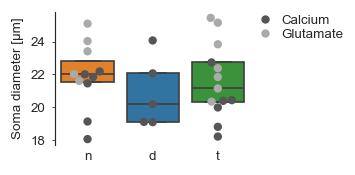

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, ax = plt.subplots(1, 1, figsize=(3, 1.5))

sns.despine(bottom=True)
sns.boxplot(ax=ax, data=df_soma, y='soma_diameter', x='Group', palette=palette, order=order, whis=False, fliersize=0)
sns.swarmplot(ax=ax, data=df_soma, y='soma_diameter', x='Group', color='k', order=order, hue='Indicator',
              palette='gray')

ax.set(ylabel='Soma diameter [µm]', xlabel=None)
ax.tick_params(axis='x', length=0)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()

plt.savefig(f'./figures/soma_sizes.pdf')